In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv',encoding = 'latin1')

In [3]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#droping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [7]:
df.sample(5)

,v1,v2
1180,ham,I'm in chennai velachery:)
3828,ham,"Sure, I'll see if I can come by in a bit"
1368,ham,Alright. I'm out--have a good night!
2371,ham,"Hmm, too many of them unfortunately... Pics ob..."
1291,ham,Hey babe! I saw you came online for a second a...


In [8]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(3)

,target,text
3937,ham,WHEN THE FIRST STRIKE IS A RED ONE. THE BIRD +...
1209,ham,His bday real is in april .
2432,ham,Really dun bluff me leh... U sleep early too. ...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#checking null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#checking duplicate values
df.duplicated().sum()

np.int64(403)

In [14]:
#removing the duplicates
df = df.drop_duplicates(keep = 'first')

In [15]:
df.duplicated().sum()

np.int64(0)

# 2.EDA

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

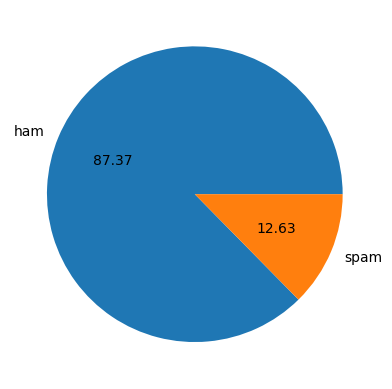

In [17]:
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
#data is not balanced

In [19]:
import nltk

In [20]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:
df.head(3)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [23]:
#finding no of words
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head(3)

,target,text,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [26]:
df[['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#for ham
df[df['target'] == 0][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# for spam
df[df['target'] == 1][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

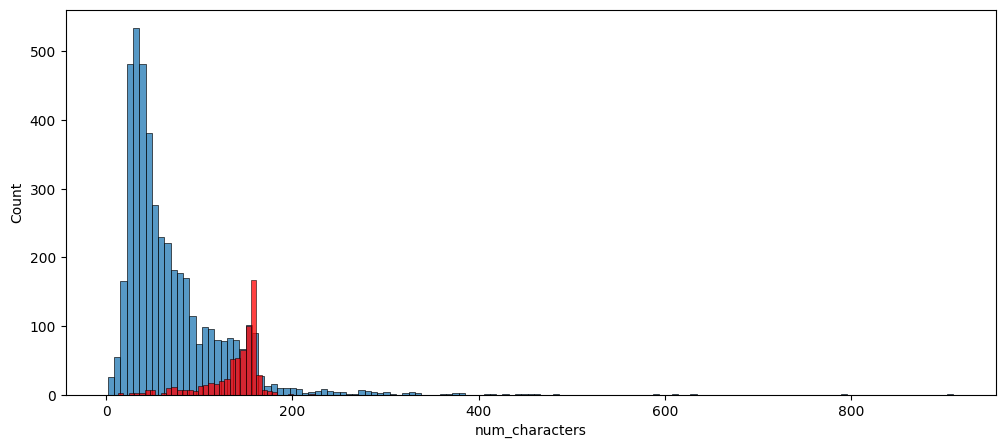

In [29]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

<Axes: xlabel='num_word', ylabel='Count'>

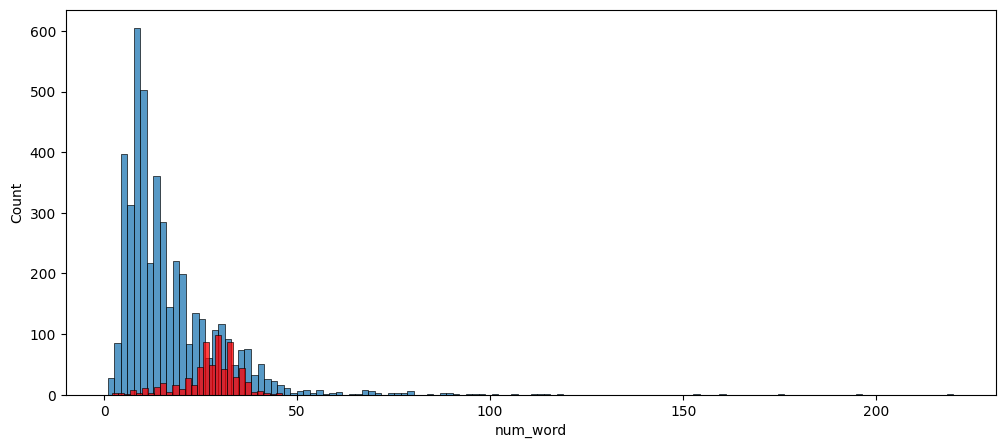

In [30]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] == 0]['num_word'])
sns.histplot(df[df['target'] == 1]['num_word'],color = 'red')

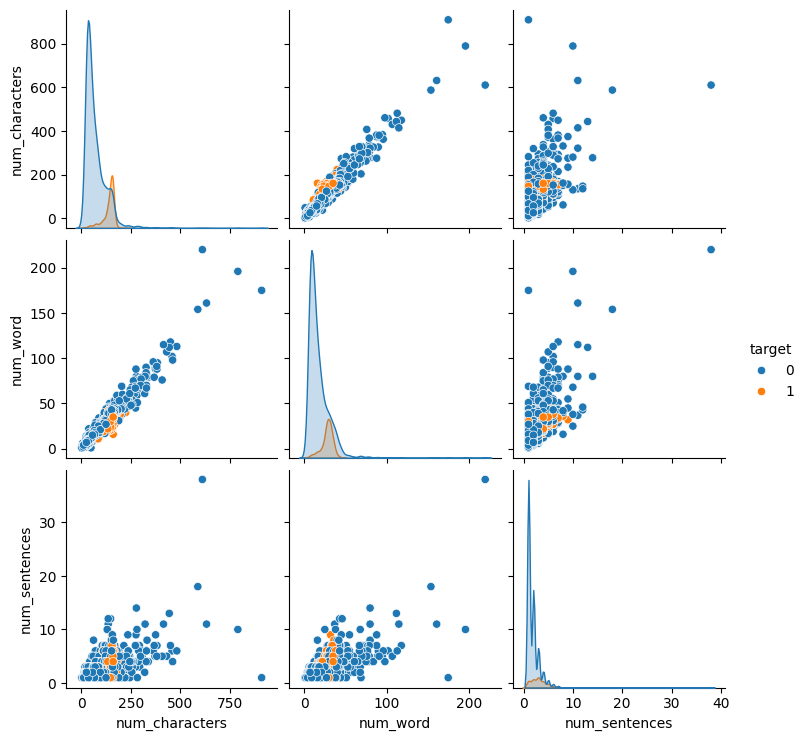

In [31]:
sns.pairplot(df,hue='target')

# Data Preprocessing #
 lower case
 tokenization
 removing special characters
 removing stop words / punctuations
 stemming

In [56]:
 nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [64]:
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer 

In [74]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Ensure required resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    # Lowercase and tokenize
    text = text.lower()
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    words = [word for word in words if word not in stopwords.words('english') and word not in string.punctuation]

    # Stemming
    words = [ps.stem(word) for word in words]

    return " ".join(words)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
df['transformed_text'] = df['text'].apply(transform_text)

In [80]:
df.head(5)

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [91]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [92]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

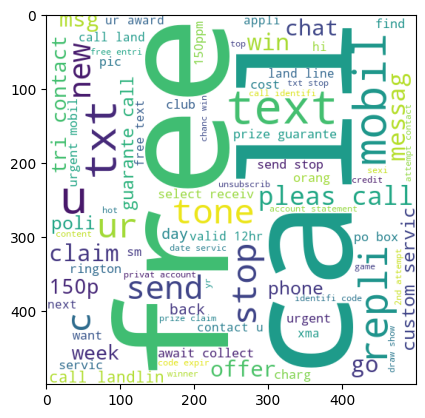

In [93]:
plt.imshow(spam_wc)

In [96]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

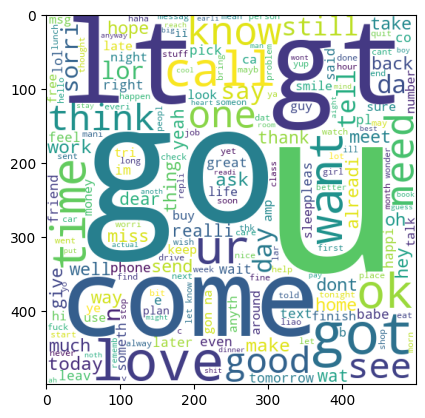

In [97]:
plt.imshow(ham_wc)

In [100]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [102]:
len(spam_corpus)

9939

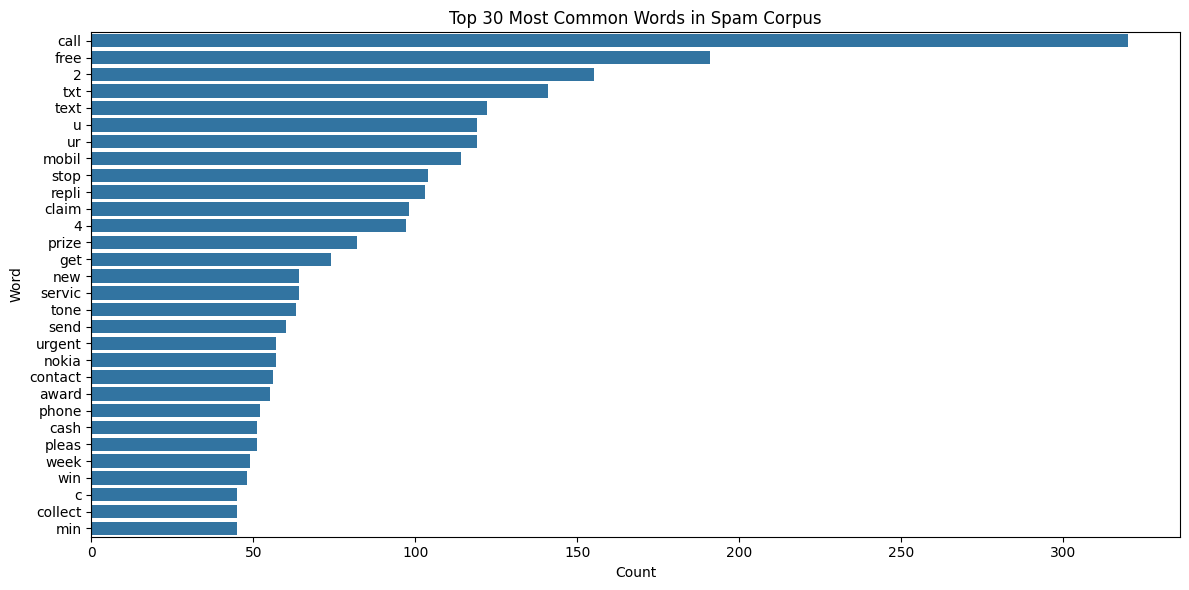

In [114]:
from collections import Counter

# Get top 30 words from the spam_corpus
top_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_top_words = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot using seaborn
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='word', data=df_top_words)
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.xlabel("Count")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

In [118]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [119]:
len(ham_corpus)

35404

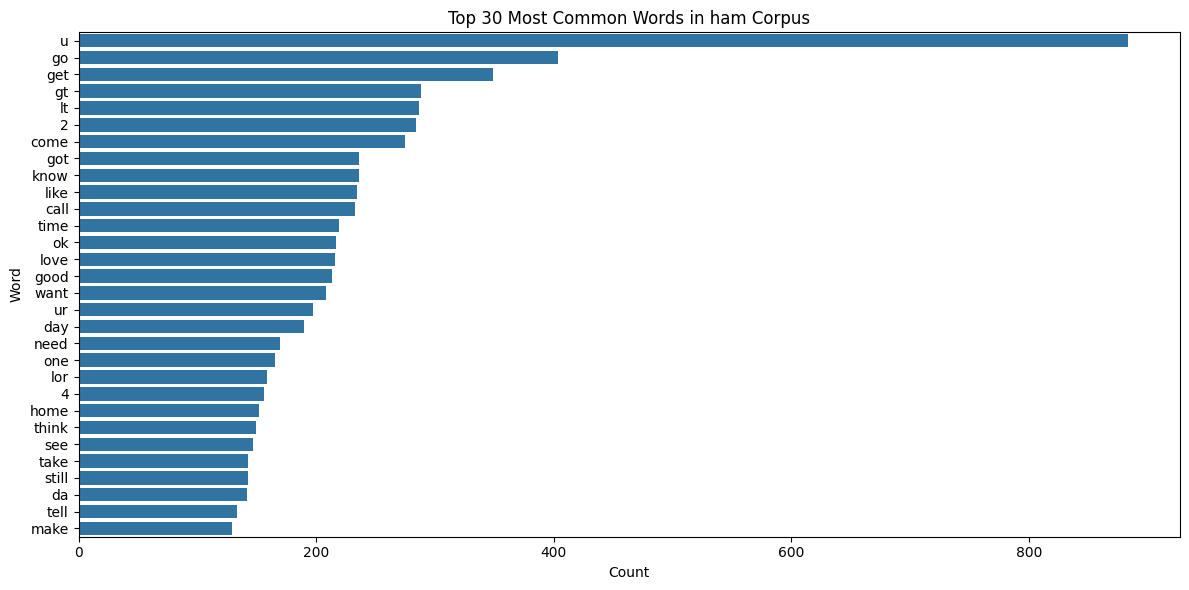

In [120]:
top_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_top_words = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot using seaborn
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='word', data=df_top_words)
plt.title("Top 30 Most Common Words in ham Corpus")
plt.xlabel("Count")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

# Model Building

In [161]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [162]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [163]:
X.shape

(5169, 3000)

In [164]:
y = df['target'].values

In [165]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [177]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [178]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [179]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [180]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [181]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [182]:
# we have choosen tfidf and mnb


In [185]:
import pickle

# Save vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

# Save model (e.g., MultinomialNB)
pickle.dump(mnb, open('model.pkl', 'wb'))

# Load vectorizer and model
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
mnb = pickle.load(open('model.pkl', 'rb'))

